<a href="https://colab.research.google.com/github/krishnaaxo/California-Housing-Price-Prediction/blob/main/California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING PACKAGES


In [221]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline



SPLITTING DATA 


In [222]:
dataset = pd.read_csv('housing.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),1)

MEDIAN_HOUSE_VALUE IS THE SPECIAL FEATURE

In [223]:
dataset['median_house_value']

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

PLOTTING FREQUENCY VS MEDIAN HOUSE PRICE

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


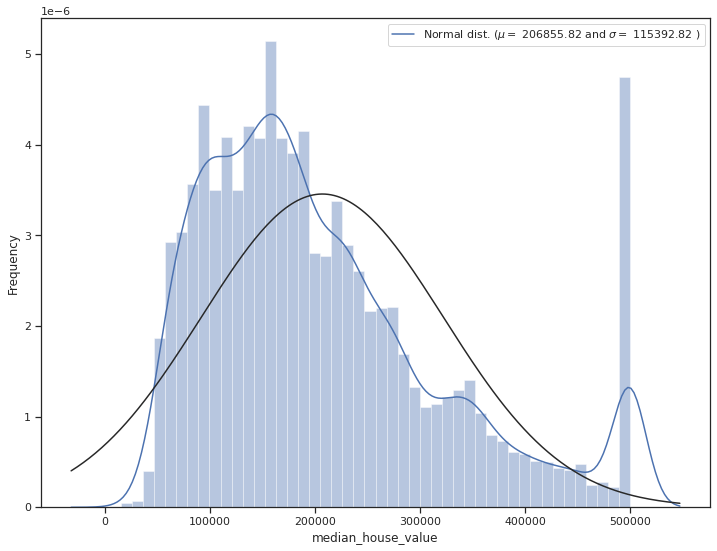

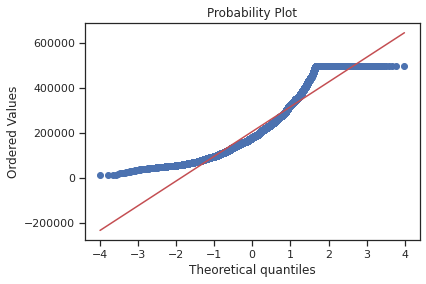

In [224]:
plt.subplots(figsize=(12,9))
sns.distplot(dataset['median_house_value'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(dataset['median_house_value'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(dataset['median_house_value'], plot=plt)
plt.show()

NORMAL DISTRIBUTION PLOTTING

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


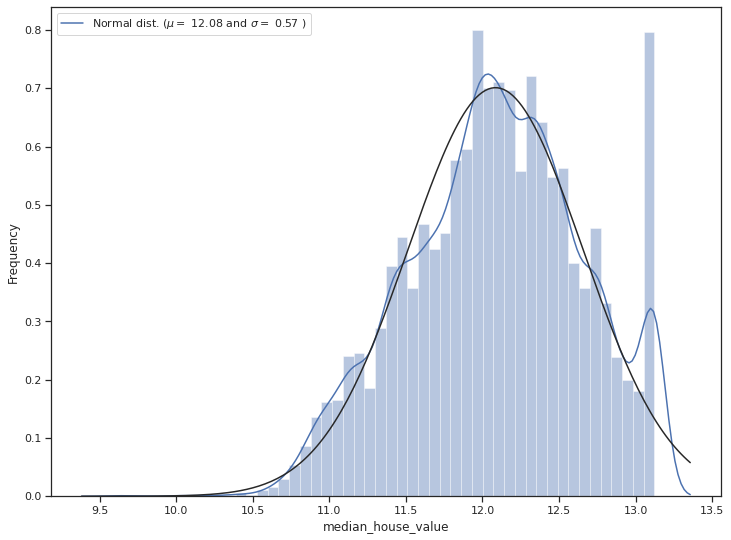

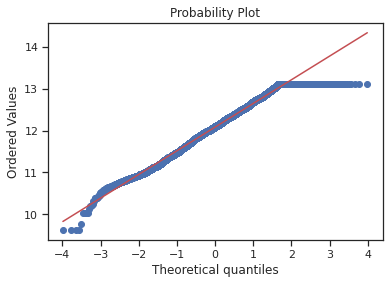

In [225]:
#we use log function which is in numpy
dataset['median_house_value'] = np.log1p(dataset['median_house_value'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(dataset['median_house_value'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(dataset['median_house_value'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(dataset['median_house_value'], plot=plt)
plt.show()

 FIND NULL VALUES IN THE DATASET

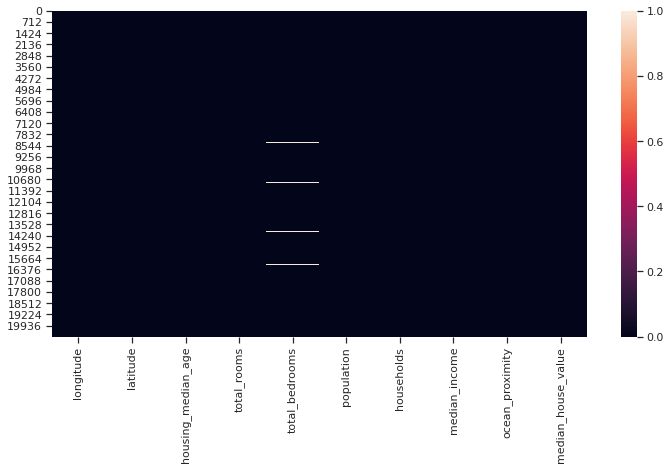

In [226]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.isnull())
plt.show()

In [227]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Corralation between all Attributes

In [228]:
train_corr = dataset.select_dtypes(include=[np.number])

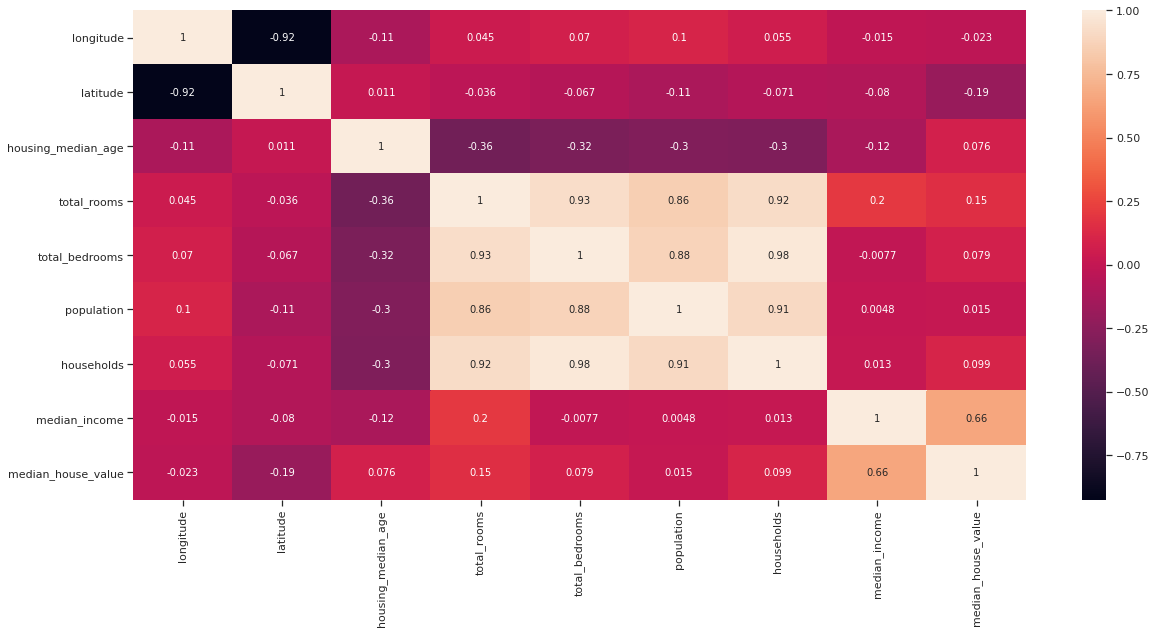

In [229]:
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

MEDIAN INCOME AND TOTAL ROOMS HAVE THE HIGHEST CORRELATION

In [230]:
#unique value of median_income
dataset.median_income.unique()

array([8.33, 8.3 , 7.26, ..., 2.36, 2.37, 2.09])

BAR PLOT 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


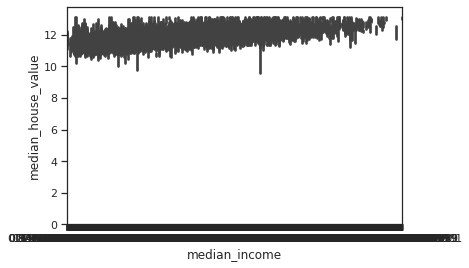

In [231]:
sns.barplot(dataset.median_income, dataset.median_house_value)

BOXPLOT

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


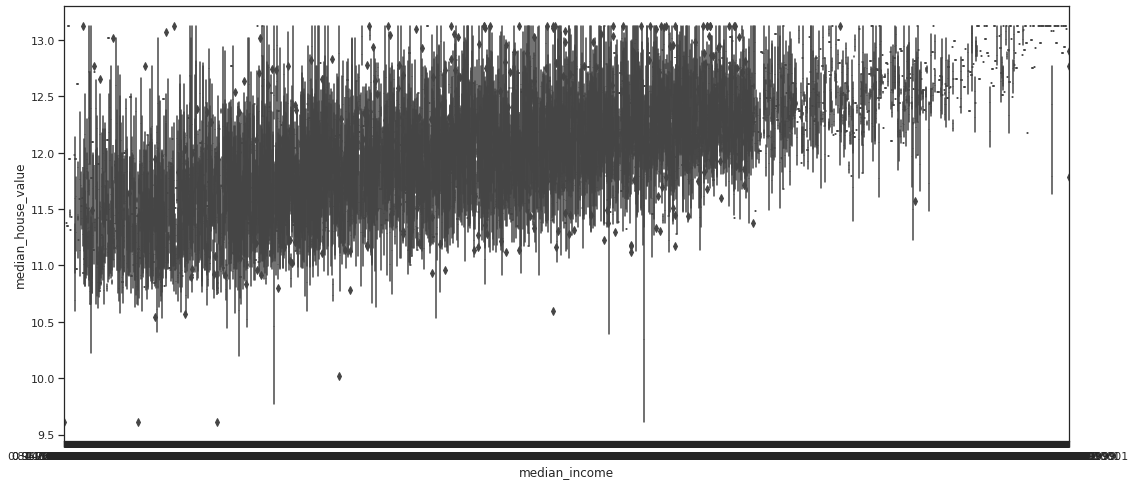

In [232]:

plt.figure(figsize=(18, 8))
sns.boxplot(dataset.median_income, dataset.median_house_value)

PAIRPLOT

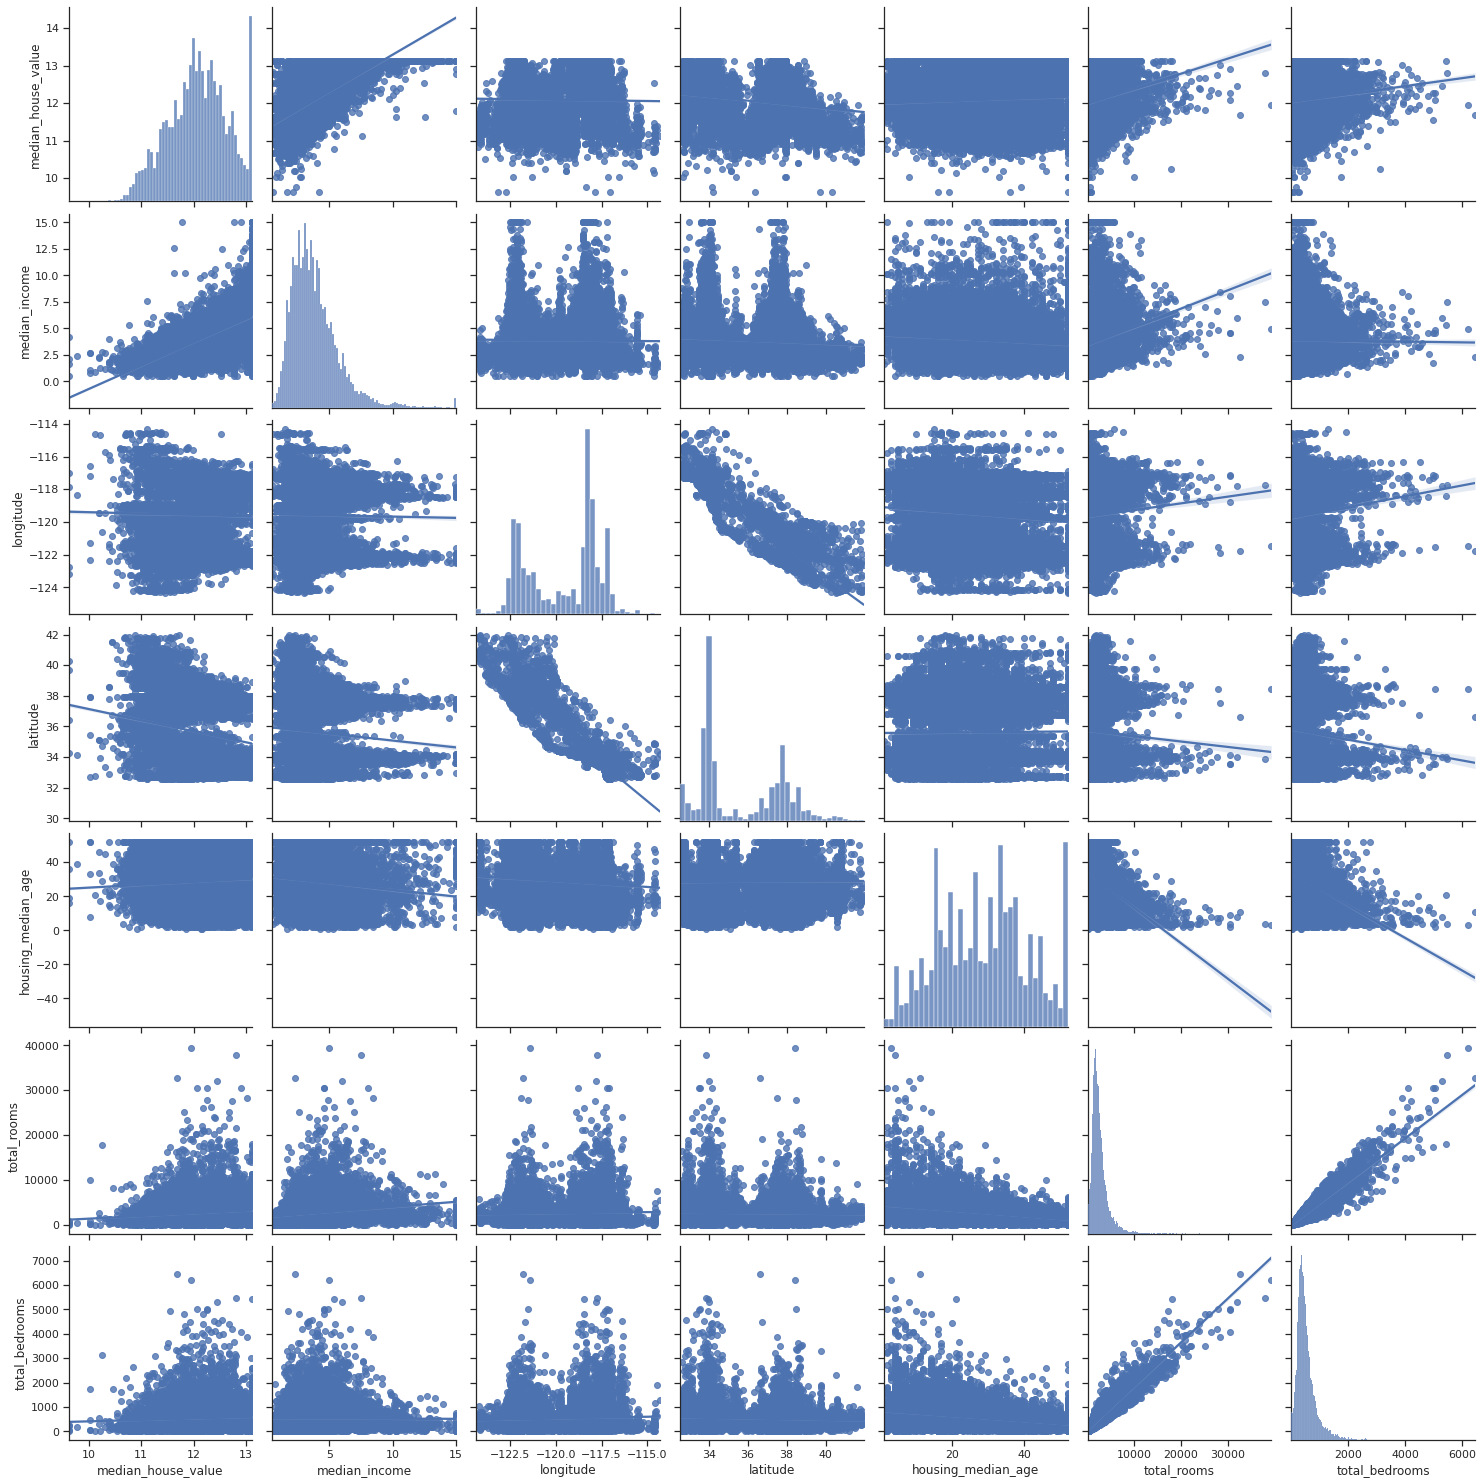

In [233]:
col = ['median_house_value', 'median_income', 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms']
sns.set(style='ticks')
sns.pairplot(dataset[col], height=3, kind='reg')

Histogram of all Attributes

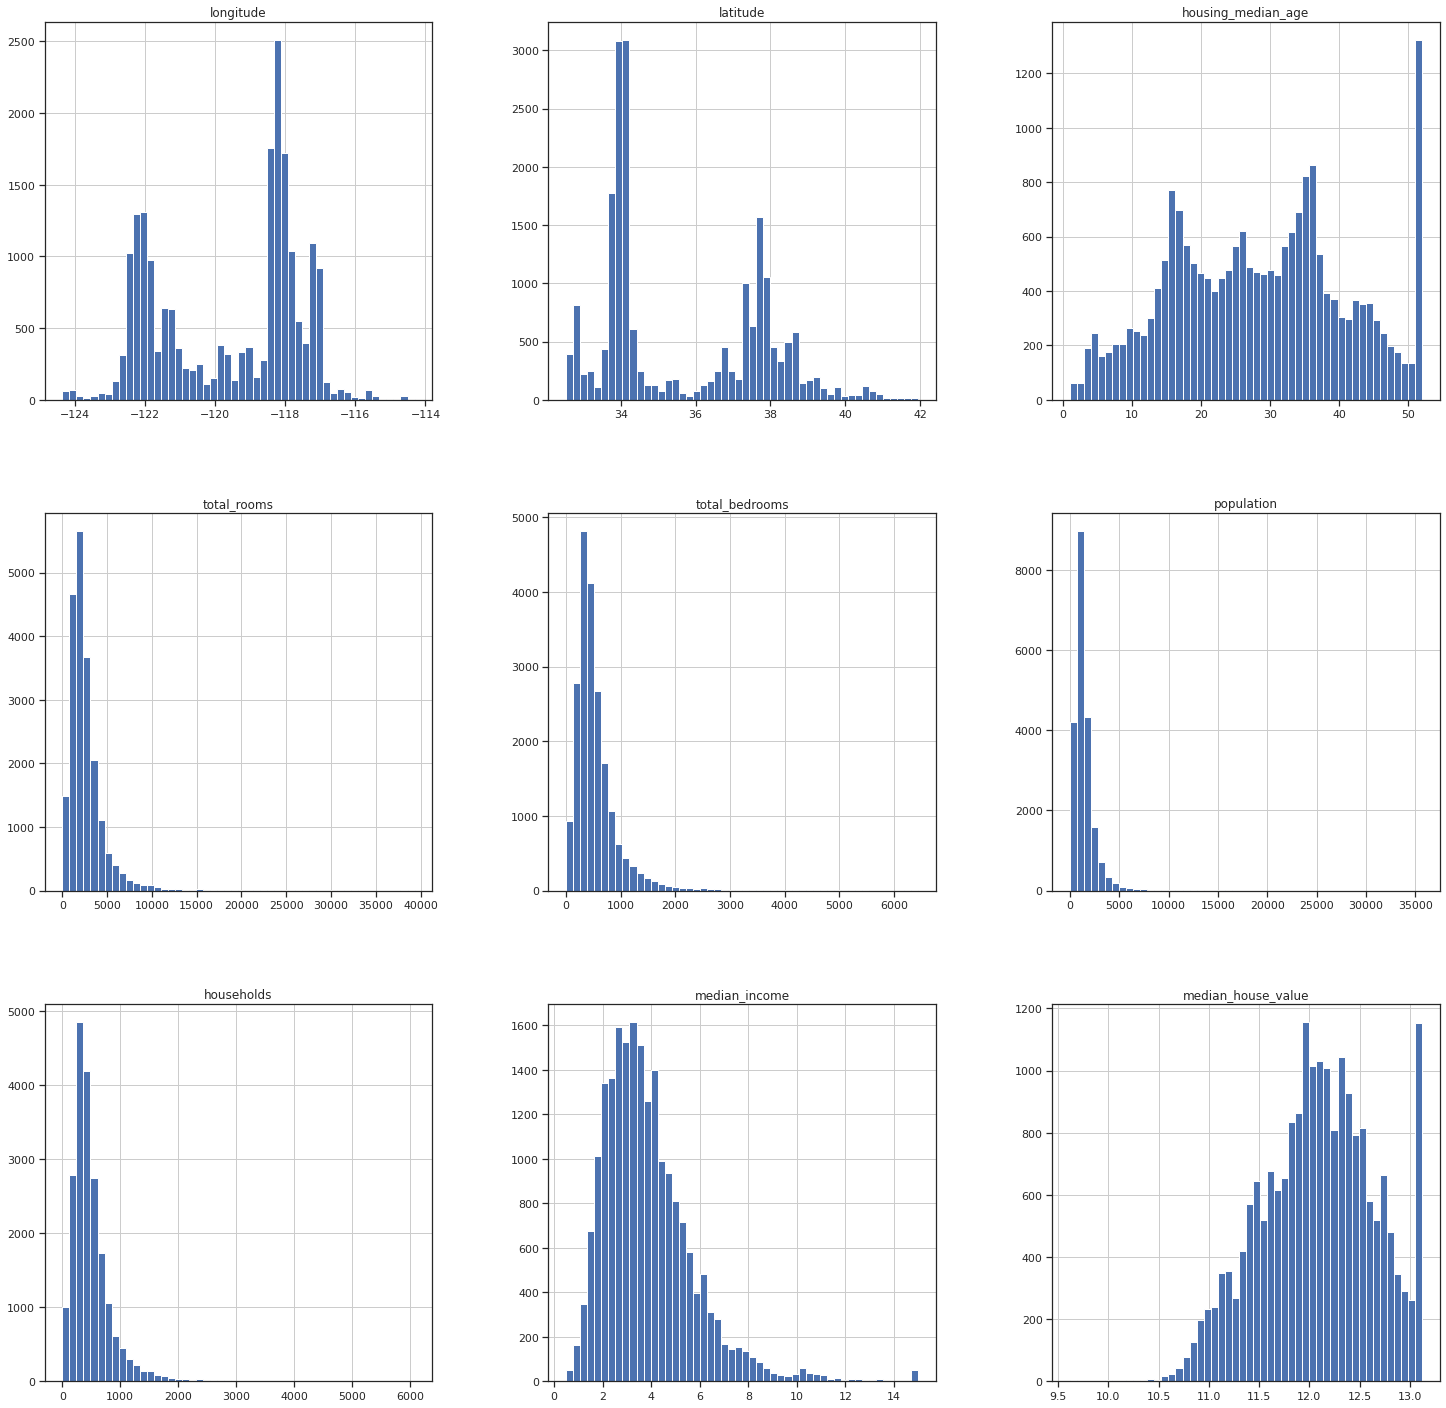

In [234]:
dataset.hist(figsize=(25,25),bins=50);

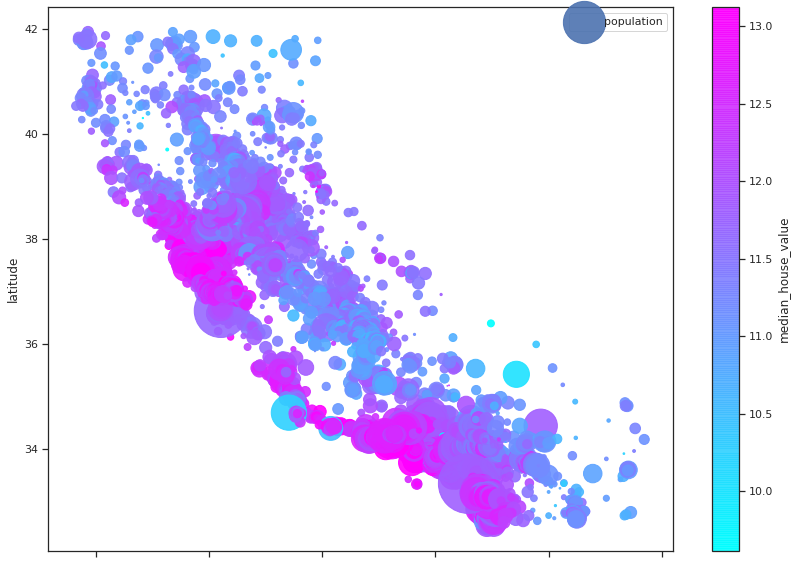

In [235]:
dataset.plot(kind='scatter', x='longitude', y='latitude', alpha=0.9, 
    s=dataset['population']/10, label='population', figsize=(14,10), 
    c='median_house_value', cmap=plt.get_cmap('cool'), colorbar=True)

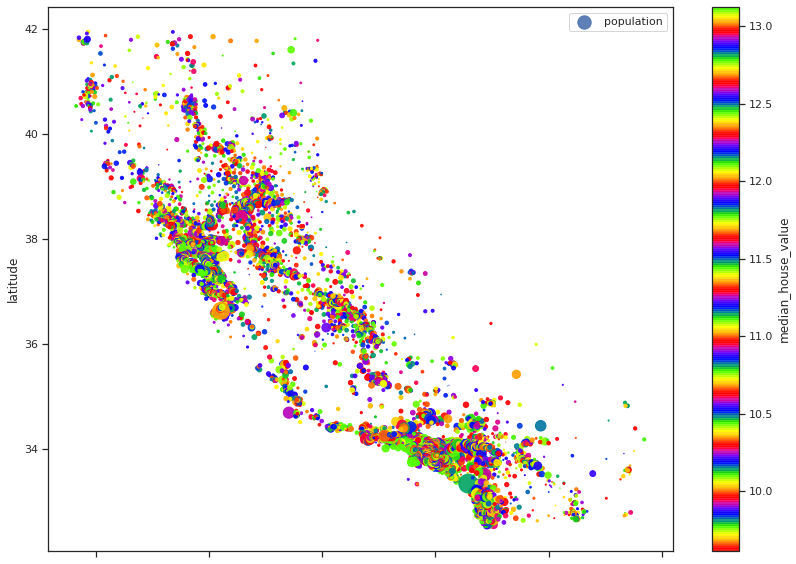

In [236]:
dataset.plot(kind='scatter', x='longitude', y='latitude', alpha=0.9, 
    s=dataset['population']/100, label='population', figsize=(14,10), 
    c='median_house_value', cmap=plt.get_cmap('prism'), colorbar=True)

FILLING ALL THE NULL VALUES

In [237]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 4:5])
X[:, 4:5] = imputer.transform(X[:, 4:5])
print(X)

[[-122.23 37.88 41 ... 126 8.3252 'NEAR BAY']
 [-122.22 37.86 21 ... 1138 8.3014 'NEAR BAY']
 [-122.24 37.85 52 ... 177 7.2574 'NEAR BAY']
 ...
 [-121.22 39.43 17 ... 433 1.7 'INLAND']
 [-121.32 39.43 18 ... 349 1.8672 'INLAND']
 [-121.24 39.37 16 ... 530 2.3886 'INLAND']]


ENCODING THE CATEGORICAL DATA 


In [238]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 0.0 ... 322 126 8.3252]
 [0.0 0.0 0.0 ... 2401 1138 8.3014]
 [0.0 0.0 0.0 ... 496 177 7.2574]
 ...
 [0.0 1.0 0.0 ... 1007 433 1.7]
 [0.0 1.0 0.0 ... 741 349 1.8672]
 [0.0 1.0 0.0 ... 1387 530 2.3886]]


SPLITTING INTO TRAIN AND TEST SET

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

APPLYING STANDARDSCALER

In [240]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

1)TRAIN WITH SVM MODEL

In [241]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Predicting the Test set results





In [242]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[131247.8  136900.  ]
 [260900.5  241300.  ]
 [150296.82 200700.  ]
 ...
 [121468.77 128600.  ]
 [260980.52 259500.  ]
 [188015.08 167600.  ]]


Evaluating the Model Performance

In [243]:
from sklearn.metrics import r2_score
rr1=r2_score(y_test, y_pred)
print(rr1)

0.7563026066784133


In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [245]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

2) APPLYING RANDOM FOREST REGRESSION MODEL

In [246]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 400, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Predicting the Test set results

In [247]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[143538.75 136900.  ]
 [244280.75 241300.  ]
 [141749.   200700.  ]
 ...
 [153007.   128600.  ]
 [224191.5  259500.  ]
 [179309.25 167600.  ]]


Evaluating the Model Performance

In [248]:
from sklearn.metrics import r2_score
rr2=r2_score(y_test, y_pred)
print(rr2)

0.8253685289788792


RMSE

In [249]:
from sklearn.metrics import mean_squared_error
predictions = regressor.predict(X_test)
lin_mse = mean_squared_error(y_test,predictions)
lin_rmse = np.sqrt(lin_mse)
print('rmse value is : ',lin_rmse)    

rmse value is :  47719.13271806513


3)APPLYING MULTIPLE REGRESSION

In [250]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the Test set results

In [251]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[216044.53 136900.  ]
 [288019.81 241300.  ]
 [179514.65 200700.  ]
 ...
 [ 89153.72 128600.  ]
 [255277.26 259500.  ]
 [213931.5  167600.  ]]


Evaluating the Model Performance

In [252]:
from sklearn.metrics import r2_score
rr3=r2_score(y_test, y_pred)
print(rr3)

0.6379361051214344


RMSE

In [253]:
from sklearn.metrics import mean_squared_error
predictions = regressor.predict(X_test)
lin_mse = mean_squared_error(y_test,predictions)
lin_rmse = np.sqrt(lin_mse)
print('rmse value is : ',lin_rmse)    

rmse value is :  68710.62440977288


4)APPLYING XGBOOST MODEL

In [254]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

[14:24:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Predicting the Test set results

In [255]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[154046.22 136900.  ]
 [281541.53 241300.  ]
 [156846.69 200700.  ]
 ...
 [114701.83 128600.  ]
 [235048.12 259500.  ]
 [219213.25 167600.  ]]


Evaluating the Model Performance

In [256]:
from sklearn.metrics import r2_score
rr4=r2_score(y_test, y_pred)
print(rr4)

0.7664751145141525


RMSE

In [257]:
from sklearn.metrics import mean_squared_error
predictions = regressor.predict(X_test)
lin_mse = mean_squared_error(y_test,predictions)
lin_rmse = np.sqrt(lin_mse)
print('rmse value is : ',lin_rmse) 

rmse value is :  55182.05498545408


Overall Model Performance 

In [258]:
data = [rr1, rr2, rr3, rr4]
index = ['SVM', 'Random Forest Regressor','Multiple Regression','XGBOOST']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
Random Forest Regressor,0.825369
XGBOOST,0.766475
SVM,0.756303
Multiple Regression,0.637936


5) APPLYING ANN

IMPORTING PACKAGES

In [259]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

 Building the ANN

In [327]:
clas = Sequential()

Adding the input layer and the first hidden layer

In [328]:
clas.add(Dense(units= 11, kernel_initializer= 'he_uniform',activation='relu'))

Adding the  hidden layer

In [329]:
clas.add(Dense(units= 400, kernel_initializer= 'he_uniform',activation='relu'))

Adding the  hidden layer

In [330]:
clas.add(Dense(units=800, kernel_initializer='he_uniform',activation='relu'))

Adding the hidden layer

In [331]:
clas.add(Dense(units=800, kernel_initializer='he_uniform',activation='relu'))

Adding the hidden layer

In [332]:
clas.add(Dense(units=800, kernel_initializer='he_uniform',activation='relu'))

Adding the hidden layer

In [333]:
clas.add(Dense(units= 800, kernel_initializer= 'he_uniform',activation='relu'))

Adding the output layer

In [334]:
clas.add(Dense(units = 1))

Compiling the ANN

In [335]:
clas.compile(optimizer = 'adam', loss = 'mean_squared_error' )

Training the ANN model on the Training set

In [336]:
model_history=clas.fit(X_train, y_train, batch_size = 60, epochs = 100)

Epoch 1/100
276/276 [==============================] - 8s 28ms/step - loss: 12482046976.0000
Epoch 2/100
276/276 [==============================] - 8s 28ms/step - loss: 5340273664.0000
Epoch 3/100
276/276 [==============================] - 8s 29ms/step - loss: 4482044928.0000
Epoch 4/100
276/276 [==============================] - 8s 29ms/step - loss: 4127542784.0000
Epoch 5/100
276/276 [==============================] - 8s 29ms/step - loss: 3919373312.0000
Epoch 6/100
276/276 [==============================] - 8s 29ms/step - loss: 3747902720.0000
Epoch 7/100
276/276 [==============================] - 8s 28ms/step - loss: 3663375104.0000
Epoch 8/100
276/276 [==============================] - 8s 28ms/step - loss: 3610496256.0000
Epoch 9/100
276/276 [==============================] - 8s 28ms/step - loss: 3518087680.0000
Epoch 10/100
276/276 [==============================] - 8s 29ms/step - loss: 3498398464.0000
Epoch 11/100
276/276 [==============================] - 8s 28ms/step - loss: 3

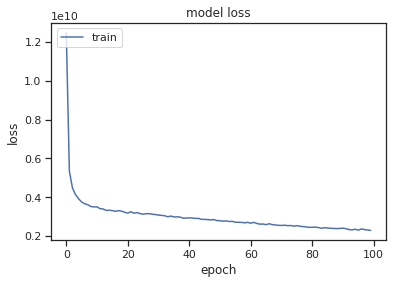

In [337]:
plt.plot(model_history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluating the Model Performance

In [338]:
y_pred = clas.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[130056.05 136900.  ]
 [239478.39 241300.  ]
 [146586.08 200700.  ]
 ...
 [135753.73 128600.  ]
 [246851.03 259500.  ]
 [156054.88 167600.  ]]


Evaluating the Model Performance

In [339]:
from sklearn.metrics import r2_score
rr5=r2_score(y_test, y_pred)
print(rr5)

0.7803421313809449


In [341]:
data = [rr1, rr2, rr3, rr4,rr5]
index = ['SVM', 'Random Forest Regressoion','Multiple Regression','XGBOOST','ANN']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
Random Forest Regressoion,0.825369
ANN,0.780342
XGBOOST,0.766475
SVM,0.756303
Multiple Regression,0.637936


The winner is Random Forest Regression . Random Forest Regression model can be used for prediction and The median income is the number one predictor of housing prices.ANN model can be further improved but it will consume more time to train the model.